In [2]:
#load normal simulation data
from simDataPreprocessing import convertToMatrix

#load sequence data as numpy array with convertToMatrix function for every protein concentration
prot1_bound = convertToMatrix('/mnt/d/data/MIME_data/data/simData/singleMIME/normalErrorTest/prot1/sequences/3.txt', maxNumSequences=5000,splitProb=3/450, readSize=100, protConc=1, seed=12678435)
prot1_unbound = convertToMatrix('/mnt/d/data/MIME_data/data/simData/singleMIME/normalErrorTest/prot1/sequences/4.txt', maxNumSequences=5000,splitProb=3/450, readSize=100, protConc=1, seed=25681)

prot6_bound = convertToMatrix('/mnt/d/data/MIME_data/data/simData/singleMIME/normalErrorTest/prot6/sequences/3.txt', maxNumSequences=5000,splitProb=3/450, readSize=100, protConc=6, seed=71092485)
prot6_unbound = convertToMatrix('/mnt/d/data/MIME_data/data/simData/singleMIME/normalErrorTest/prot6/sequences/4.txt', maxNumSequences=5000,splitProb=3/450, readSize=100, protConc=6, seed=481276)

prot15_bound = convertToMatrix('/mnt/d/data/MIME_data/data/simData/singleMIME/normalErrorTest/prot15/sequences/3.txt', maxNumSequences=5000,splitProb=3/450, readSize=100, protConc=15, seed=2671)
prot15_unbound = convertToMatrix('/mnt/d/data/MIME_data/data/simData/singleMIME/normalErrorTest/prot15/sequences/4.txt', maxNumSequences=5000,splitProb=3/450, readSize=100, protConc=15, seed=92178)

prot30_bound = convertToMatrix('/mnt/d/data/MIME_data/data/simData/singleMIME/normalErrorTest/prot30/sequences/3.txt', maxNumSequences=5000,splitProb=3/450, readSize=100, protConc=30, seed=28154)
prot30_unbound = convertToMatrix('/mnt/d/data/MIME_data/data/simData/singleMIME/normalErrorTest/prot30/sequences/4.txt', maxNumSequences=5000,splitProb=3/450, readSize=100, protConc=30, seed=1823467)

In [4]:
#prepare data for training

import numpy as np
from sklearn.model_selection import train_test_split

#combine all bound and unbound data into one array
bound = np.concatenate((prot1_bound, prot6_bound, prot15_bound, prot30_bound), axis=0)
unbound = np.concatenate((prot1_unbound, prot6_unbound, prot15_unbound, prot30_unbound), axis=0)

#create labels for bound and unbound data
bound_labels = np.ones((bound.shape[0],1))
unbound_labels = np.zeros((unbound.shape[0],1))

#combine bound and unbound data and labels into one array
data = np.concatenate((bound, unbound), axis=0)
labels = np.concatenate((bound_labels, unbound_labels), axis=0)

#create training and test data
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.4, random_state=42)

In [5]:
# read in kd values
kds = np.loadtxt('/mnt/d/data/MIME_data/data/simData/singleMIME/normalErrorTest/prot1/single_kds.txt')

In [13]:
#train logsitic regression model with different regularization parameters
from sklearn.linear_model import LogisticRegression
from scipy.stats import pearsonr

#regularization parameter C
C = [0.01, 0.1, 1, 10, 100, 1000]
#regularization parameter l1_ratio
l1_ratio = [0, 0.25, 0.5, 0.75, 1]

#train model for every combination of C and l1_ratio and evaluate correlation between weights and true kd values
for c in C:
    for l1 in l1_ratio:
        model = LogisticRegression(penalty='elasticnet', solver='saga', C=c, l1_ratio=l1)
        model.fit(X_train, y_train.ravel())
        #get model weights
        weights = model.coef_[0][1:]*-1
        #correlation between weights and log of kd values
        corr, _ = pearsonr(np.log(kds), weights)        
        print("C: " + str(c) + " l1_ratio: " + str(l1) + " corr: " + str(corr.round(3)) + " score: " + str(model.score(X_test, y_test).round(3)))

C: 0.01 l1_ratio: 0 corr: 0.847 score: 0.54
C: 0.01 l1_ratio: 0.25 corr: 0.853 score: 0.539
C: 0.01 l1_ratio: 0.5 corr: 0.779 score: 0.536
C: 0.01 l1_ratio: 0.75 corr: 0.659 score: 0.534
C: 0.01 l1_ratio: 1 corr: 0.458 score: 0.527
C: 0.1 l1_ratio: 0 corr: 0.845 score: 0.54
C: 0.1 l1_ratio: 0.25 corr: 0.853 score: 0.54
C: 0.1 l1_ratio: 0.5 corr: 0.86 score: 0.54
C: 0.1 l1_ratio: 0.75 corr: 0.865 score: 0.54
C: 0.1 l1_ratio: 1 corr: 0.869 score: 0.539
C: 1 l1_ratio: 0 corr: 0.844 score: 0.54
C: 1 l1_ratio: 0.25 corr: 0.845 score: 0.54
C: 1 l1_ratio: 0.5 corr: 0.846 score: 0.54
C: 1 l1_ratio: 0.75 corr: 0.847 score: 0.54
C: 1 l1_ratio: 1 corr: 0.848 score: 0.54
C: 10 l1_ratio: 0 corr: 0.844 score: 0.54
C: 10 l1_ratio: 0.25 corr: 0.844 score: 0.54
C: 10 l1_ratio: 0.5 corr: 0.844 score: 0.54
C: 10 l1_ratio: 0.75 corr: 0.844 score: 0.54
C: 10 l1_ratio: 1 corr: 0.845 score: 0.54
C: 100 l1_ratio: 0 corr: 0.844 score: 0.54
C: 100 l1_ratio: 0.25 corr: 0.844 score: 0.54
C: 100 l1_ratio: 0.5 corr

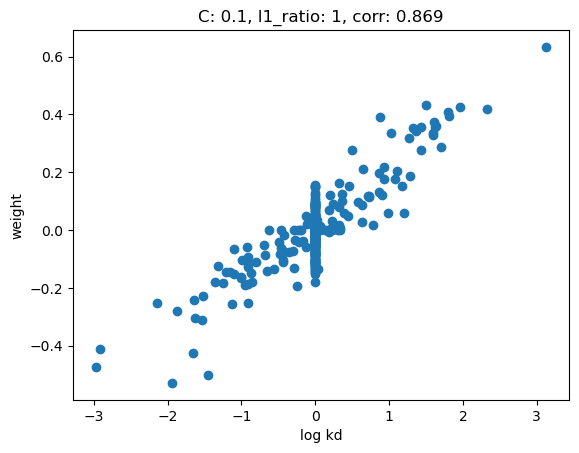

In [14]:
#plot weights vs log of kd values for highest correlation model
import matplotlib.pyplot as plt
model = LogisticRegression(penalty='elasticnet', solver='saga', C=0.1, l1_ratio=1)
model.fit(X_train, y_train.ravel())
weights = model.coef_[0][1:]*-1
plt.scatter(np.log(kds), weights)
plt.xlabel("log kd")
plt.ylabel("weight")
plt.title("C: 0.1, l1_ratio: 1, corr: 0.869")
plt.show()

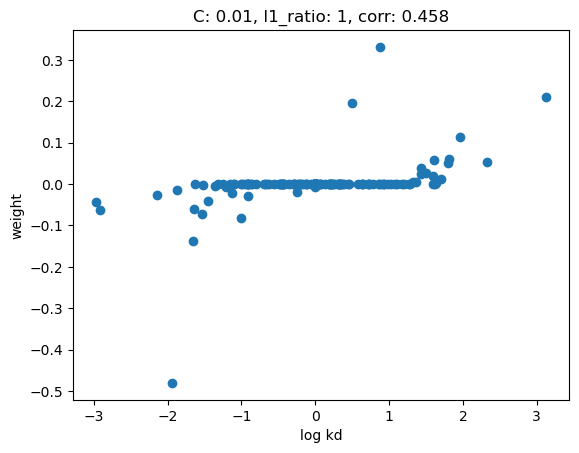

In [15]:
#plot weights vs log of kd values for lowest correlation model
model = LogisticRegression(penalty='elasticnet', solver='saga', C=0.01, l1_ratio=1)
model.fit(X_train, y_train.ravel())
weights = model.coef_[0][1:]*-1
plt.scatter(np.log(kds), weights)
plt.xlabel("log kd")
plt.ylabel("weight")
plt.title("C: 0.01, l1_ratio: 1, corr: 0.458")
plt.show()

### Conclusion

l1/lasso regression seems to be enough. no elastic net needed.
but it is more sensitive to lambda. too high lambda shrinkes almost all weights to zero.
Seems to be not very sensitive to very low lambda values. Maybe no regularization needed when error is low.

### Same procedure as above but with high error data

In [16]:
#load sequence data as numpy array with convertToMatrix function for every protein concentration
prot1_bound = convertToMatrix('/mnt/d/data/MIME_data/data/simData/singleMIME/highErrorTest/prot1/sequences/3.txt', maxNumSequences=5000,splitProb=3/450, readSize=100, protConc=1, seed=12678435)
prot1_unbound = convertToMatrix('/mnt/d/data/MIME_data/data/simData/singleMIME/highErrorTest/prot1/sequences/4.txt', maxNumSequences=5000,splitProb=3/450, readSize=100, protConc=1, seed=25681)

prot6_bound = convertToMatrix('/mnt/d/data/MIME_data/data/simData/singleMIME/highErrorTest/prot6/sequences/3.txt', maxNumSequences=5000,splitProb=3/450, readSize=100, protConc=6, seed=71092485)
prot6_unbound = convertToMatrix('/mnt/d/data/MIME_data/data/simData/singleMIME/highErrorTest/prot6/sequences/4.txt', maxNumSequences=5000,splitProb=3/450, readSize=100, protConc=6, seed=481276)

prot15_bound = convertToMatrix('/mnt/d/data/MIME_data/data/simData/singleMIME/highErrorTest/prot15/sequences/3.txt', maxNumSequences=5000,splitProb=3/450, readSize=100, protConc=15, seed=2671)
prot15_unbound = convertToMatrix('/mnt/d/data/MIME_data/data/simData/singleMIME/highErrorTest/prot15/sequences/4.txt', maxNumSequences=5000,splitProb=3/450, readSize=100, protConc=15, seed=92178)

prot30_bound = convertToMatrix('/mnt/d/data/MIME_data/data/simData/singleMIME/highErrorTest/prot30/sequences/3.txt', maxNumSequences=5000,splitProb=3/450, readSize=100, protConc=30, seed=28154)
prot30_unbound = convertToMatrix('/mnt/d/data/MIME_data/data/simData/singleMIME/highErrorTest/prot30/sequences/4.txt', maxNumSequences=5000,splitProb=3/450, readSize=100, protConc=30, seed=1823467)

#combine all bound and unbound data into one array
bound = np.concatenate((prot1_bound, prot6_bound, prot15_bound, prot30_bound), axis=0)
unbound = np.concatenate((prot1_unbound, prot6_unbound, prot15_unbound, prot30_unbound), axis=0)

#create labels for bound and unbound data
bound_labels = np.ones((bound.shape[0],1))
unbound_labels = np.zeros((unbound.shape[0],1))

#combine bound and unbound data and labels into one array
data = np.concatenate((bound, unbound), axis=0)
labels = np.concatenate((bound_labels, unbound_labels), axis=0)

#create training and test data
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.4, random_state=42)

# read in kd values
kds = np.loadtxt('/mnt/d/data/MIME_data/data/simData/singleMIME/highErrorTest/prot1/single_kds.txt')

#train logsitic regression model with different regularization parameters
from sklearn.linear_model import LogisticRegression
from scipy.stats import pearsonr

#regularization parameter C
C = [0.01, 0.1, 1, 10, 100, 1000]
#regularization parameter l1_ratio
l1_ratio = [0, 0.25, 0.5, 0.75, 1]

#train model for every combination of C and l1_ratio and evaluate correlation between weights and true kd values
for c in C:
    for l1 in l1_ratio:
        model = LogisticRegression(penalty='elasticnet', solver='saga', C=c, l1_ratio=l1)
        model.fit(X_train, y_train.ravel())
        #get model weights
        weights = model.coef_[0][1:]*-1
        #correlation between weights and log of kd values
        corr, _ = pearsonr(np.log(kds), weights)        
        print("C: " + str(c) + " l1_ratio: " + str(l1) + " corr: " + str(corr.round(3)) + " score: " + str(model.score(X_test, y_test).round(3)))

C: 0.01 l1_ratio: 0 corr: 0.825 score: 0.538
C: 0.01 l1_ratio: 0.25 corr: 0.834 score: 0.537
C: 0.01 l1_ratio: 0.5 corr: 0.757 score: 0.536
C: 0.01 l1_ratio: 0.75 corr: 0.623 score: 0.533
C: 0.01 l1_ratio: 1 corr: 0.429 score: 0.525
C: 0.1 l1_ratio: 0 corr: 0.824 score: 0.539
C: 0.1 l1_ratio: 0.25 corr: 0.832 score: 0.539
C: 0.1 l1_ratio: 0.5 corr: 0.838 score: 0.539
C: 0.1 l1_ratio: 0.75 corr: 0.843 score: 0.539
C: 0.1 l1_ratio: 1 corr: 0.847 score: 0.539
C: 1 l1_ratio: 0 corr: 0.824 score: 0.539
C: 1 l1_ratio: 0.25 corr: 0.824 score: 0.539
C: 1 l1_ratio: 0.5 corr: 0.825 score: 0.539
C: 1 l1_ratio: 0.75 corr: 0.826 score: 0.539
C: 1 l1_ratio: 1 corr: 0.827 score: 0.539
C: 10 l1_ratio: 0 corr: 0.823 score: 0.539
C: 10 l1_ratio: 0.25 corr: 0.824 score: 0.539
C: 10 l1_ratio: 0.5 corr: 0.824 score: 0.539
C: 10 l1_ratio: 0.75 corr: 0.824 score: 0.539
C: 10 l1_ratio: 1 corr: 0.824 score: 0.539
C: 100 l1_ratio: 0 corr: 0.823 score: 0.539
C: 100 l1_ratio: 0.25 corr: 0.823 score: 0.539
C: 100 

same as above, just too high l1 regularization is bad. otherwhise very robust.
also only slightly worse correlations then normal error. maybe even higher error test.

### no epistasis no error test

In [17]:
#load sequence data as numpy array with convertToMatrix function for every protein concentration
prot1_bound = convertToMatrix('/mnt/d/data/MIME_data/data/simData/singleMIME/noEpistasisError/prot1/sequences/3.txt', maxNumSequences=5000,splitProb=3/450, readSize=100, protConc=1, seed=12678435)
prot1_unbound = convertToMatrix('/mnt/d/data/MIME_data/data/simData/singleMIME/noEpistasisError/prot1/sequences/4.txt', maxNumSequences=5000,splitProb=3/450, readSize=100, protConc=1, seed=25681)

prot6_bound = convertToMatrix('/mnt/d/data/MIME_data/data/simData/singleMIME/noEpistasisError/prot6/sequences/3.txt', maxNumSequences=5000,splitProb=3/450, readSize=100, protConc=6, seed=71092485)
prot6_unbound = convertToMatrix('/mnt/d/data/MIME_data/data/simData/singleMIME/noEpistasisError/prot6/sequences/4.txt', maxNumSequences=5000,splitProb=3/450, readSize=100, protConc=6, seed=481276)

prot15_bound = convertToMatrix('/mnt/d/data/MIME_data/data/simData/singleMIME/noEpistasisError/prot15/sequences/3.txt', maxNumSequences=5000,splitProb=3/450, readSize=100, protConc=15, seed=2671)
prot15_unbound = convertToMatrix('/mnt/d/data/MIME_data/data/simData/singleMIME/noEpistasisError/prot15/sequences/4.txt', maxNumSequences=5000,splitProb=3/450, readSize=100, protConc=15, seed=92178)

prot30_bound = convertToMatrix('/mnt/d/data/MIME_data/data/simData/singleMIME/noEpistasisError/prot30/sequences/3.txt', maxNumSequences=5000,splitProb=3/450, readSize=100, protConc=30, seed=28154)
prot30_unbound = convertToMatrix('/mnt/d/data/MIME_data/data/simData/singleMIME/noEpistasisError/prot30/sequences/4.txt', maxNumSequences=5000,splitProb=3/450, readSize=100, protConc=30, seed=1823467)

#combine all bound and unbound data into one array
bound = np.concatenate((prot1_bound, prot6_bound, prot15_bound, prot30_bound), axis=0)
unbound = np.concatenate((prot1_unbound, prot6_unbound, prot15_unbound, prot30_unbound), axis=0)

#create labels for bound and unbound data
bound_labels = np.ones((bound.shape[0],1))
unbound_labels = np.zeros((unbound.shape[0],1))

#combine bound and unbound data and labels into one array
data = np.concatenate((bound, unbound), axis=0)
labels = np.concatenate((bound_labels, unbound_labels), axis=0)

#create training and test data
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.4, random_state=42)

# read in kd values
kds = np.loadtxt('/mnt/d/data/MIME_data/data/simData/singleMIME/noEpistasisError/prot1/single_kds.txt')

#train logsitic regression model with different regularization parameters
from sklearn.linear_model import LogisticRegression
from scipy.stats import pearsonr

#regularization parameter C
C = [0.01, 0.1, 1, 10, 100, 1000]
#regularization parameter l1_ratio
l1_ratio = [0, 0.25, 0.5, 0.75, 1]

#train model for every combination of C and l1_ratio and evaluate correlation between weights and true kd values
for c in C:
    for l1 in l1_ratio:
        model = LogisticRegression(penalty='elasticnet', solver='saga', C=c, l1_ratio=l1)
        model.fit(X_train, y_train.ravel())
        #get model weights
        weights = model.coef_[0][1:]*-1
        #correlation between weights and log of kd values
        corr, _ = pearsonr(np.log(kds), weights)        
        print("C: " + str(c) + " l1_ratio: " + str(l1) + " corr: " + str(corr.round(3)) + " score: " + str(model.score(X_test, y_test).round(3)))

C: 0.01 l1_ratio: 0 corr: 0.808 score: 0.533
C: 0.01 l1_ratio: 0.25 corr: 0.766 score: 0.531
C: 0.01 l1_ratio: 0.5 corr: 0.622 score: 0.528
C: 0.01 l1_ratio: 0.75 corr: 0.472 score: 0.521
C: 0.01 l1_ratio: 1 corr: 0.36 score: 0.519
C: 0.1 l1_ratio: 0 corr: 0.802 score: 0.531
C: 0.1 l1_ratio: 0.25 corr: 0.811 score: 0.531
C: 0.1 l1_ratio: 0.5 corr: 0.816 score: 0.532
C: 0.1 l1_ratio: 0.75 corr: 0.817 score: 0.533
C: 0.1 l1_ratio: 1 corr: 0.816 score: 0.533
C: 1 l1_ratio: 0 corr: 0.801 score: 0.531
C: 1 l1_ratio: 0.25 corr: 0.802 score: 0.531
C: 1 l1_ratio: 0.5 corr: 0.803 score: 0.531
C: 1 l1_ratio: 0.75 corr: 0.804 score: 0.531
C: 1 l1_ratio: 1 corr: 0.805 score: 0.532
C: 10 l1_ratio: 0 corr: 0.801 score: 0.531
C: 10 l1_ratio: 0.25 corr: 0.801 score: 0.531
C: 10 l1_ratio: 0.5 corr: 0.802 score: 0.531
C: 10 l1_ratio: 0.75 corr: 0.802 score: 0.531
C: 10 l1_ratio: 1 corr: 0.802 score: 0.531
C: 100 l1_ratio: 0 corr: 0.801 score: 0.531
C: 100 l1_ratio: 0.25 corr: 0.801 score: 0.531
C: 100 l

for some reason correlation even lower.
results should look better becasue now no error and no epsitasis.
regularization pattern looks similar

### 0.01 error
signal to noise ratio .5

In [18]:
#load sequence data as numpy array with convertToMatrix function for every protein concentration
prot1_bound = convertToMatrix('/mnt/d/data/MIME_data/data/simData/singleMIME/veryHighError/prot1/sequences/3.txt', maxNumSequences=5000,splitProb=3/450, readSize=100, protConc=1, seed=12678435)
prot1_unbound = convertToMatrix('/mnt/d/data/MIME_data/data/simData/singleMIME/veryHighError/prot1/sequences/4.txt', maxNumSequences=5000,splitProb=3/450, readSize=100, protConc=1, seed=25681)

prot6_bound = convertToMatrix('/mnt/d/data/MIME_data/data/simData/singleMIME/veryHighError/prot6/sequences/3.txt', maxNumSequences=5000,splitProb=3/450, readSize=100, protConc=6, seed=71092485)
prot6_unbound = convertToMatrix('/mnt/d/data/MIME_data/data/simData/singleMIME/veryHighError/prot6/sequences/4.txt', maxNumSequences=5000,splitProb=3/450, readSize=100, protConc=6, seed=481276)

prot15_bound = convertToMatrix('/mnt/d/data/MIME_data/data/simData/singleMIME/veryHighError/prot15/sequences/3.txt', maxNumSequences=5000,splitProb=3/450, readSize=100, protConc=15, seed=2671)
prot15_unbound = convertToMatrix('/mnt/d/data/MIME_data/data/simData/singleMIME/veryHighError/prot15/sequences/4.txt', maxNumSequences=5000,splitProb=3/450, readSize=100, protConc=15, seed=92178)

prot30_bound = convertToMatrix('/mnt/d/data/MIME_data/data/simData/singleMIME/veryHighError/prot30/sequences/3.txt', maxNumSequences=5000,splitProb=3/450, readSize=100, protConc=30, seed=28154)
prot30_unbound = convertToMatrix('/mnt/d/data/MIME_data/data/simData/singleMIME/veryHighError/prot30/sequences/4.txt', maxNumSequences=5000,splitProb=3/450, readSize=100, protConc=30, seed=1823467)

#combine all bound and unbound data into one array
bound = np.concatenate((prot1_bound, prot6_bound, prot15_bound, prot30_bound), axis=0)
unbound = np.concatenate((prot1_unbound, prot6_unbound, prot15_unbound, prot30_unbound), axis=0)

#create labels for bound and unbound data
bound_labels = np.ones((bound.shape[0],1))
unbound_labels = np.zeros((unbound.shape[0],1))

#combine bound and unbound data and labels into one array
data = np.concatenate((bound, unbound), axis=0)
labels = np.concatenate((bound_labels, unbound_labels), axis=0)

#create training and test data
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.4, random_state=42)

# read in kd values
kds = np.loadtxt('/mnt/d/data/MIME_data/data/simData/singleMIME/veryHighError/prot1/single_kds.txt')

#train logsitic regression model with different regularization parameters
from sklearn.linear_model import LogisticRegression
from scipy.stats import pearsonr

#regularization parameter C
C = [0.01, 0.1, 1, 10, 100, 1000]
#regularization parameter l1_ratio
l1_ratio = [0, 0.25, 0.5, 0.75, 1]

#train model for every combination of C and l1_ratio and evaluate correlation between weights and true kd values
for c in C:
    for l1 in l1_ratio:
        model = LogisticRegression(penalty='elasticnet', solver='saga', C=c, l1_ratio=l1)
        model.fit(X_train, y_train.ravel())
        #get model weights
        weights = model.coef_[0][1:]*-1
        #correlation between weights and log of kd values
        corr, _ = pearsonr(np.log(kds), weights)        
        print("C: " + str(c) + " l1_ratio: " + str(l1) + " corr: " + str(corr.round(3)) + " score: " + str(model.score(X_test, y_test).round(3)))

C: 0.01 l1_ratio: 0 corr: 0.784 score: 0.518
C: 0.01 l1_ratio: 0.25 corr: 0.824 score: 0.519
C: 0.01 l1_ratio: 0.5 corr: 0.736 score: 0.514
C: 0.01 l1_ratio: 0.75 corr: 0.545 score: 0.509
C: 0.01 l1_ratio: 1 corr: 0.433 score: 0.505
C: 0.1 l1_ratio: 0 corr: 0.782 score: 0.518
C: 0.1 l1_ratio: 0.25 corr: 0.793 score: 0.517
C: 0.1 l1_ratio: 0.5 corr: 0.803 score: 0.518
C: 0.1 l1_ratio: 0.75 corr: 0.811 score: 0.518
C: 0.1 l1_ratio: 1 corr: 0.817 score: 0.518
C: 1 l1_ratio: 0 corr: 0.782 score: 0.518
C: 1 l1_ratio: 0.25 corr: 0.783 score: 0.518
C: 1 l1_ratio: 0.5 corr: 0.784 score: 0.518
C: 1 l1_ratio: 0.75 corr: 0.785 score: 0.518
C: 1 l1_ratio: 1 corr: 0.786 score: 0.518
C: 10 l1_ratio: 0 corr: 0.782 score: 0.518
C: 10 l1_ratio: 0.25 corr: 0.782 score: 0.518
C: 10 l1_ratio: 0.5 corr: 0.782 score: 0.518
C: 10 l1_ratio: 0.75 corr: 0.782 score: 0.518
C: 10 l1_ratio: 1 corr: 0.782 score: 0.518
C: 100 l1_ratio: 0 corr: 0.782 score: 0.518
C: 100 l1_ratio: 0.25 corr: 0.782 score: 0.518
C: 100 

still pretty decent correlation

### now p_mut 0.001 and p_error 0.05
extremely bad signal-to-noise ratio

In [19]:
#load sequence data as numpy array with convertToMatrix function for every protein concentration
prot1_bound = convertToMatrix('/mnt/d/data/MIME_data/data/simData/singleMIME/extremeHighError/prot1/sequences/3.txt', maxNumSequences=5000,splitProb=3/450, readSize=100, protConc=1, seed=12678435)
prot1_unbound = convertToMatrix('/mnt/d/data/MIME_data/data/simData/singleMIME/extremeHighError/prot1/sequences/4.txt', maxNumSequences=5000,splitProb=3/450, readSize=100, protConc=1, seed=25681)

prot6_bound = convertToMatrix('/mnt/d/data/MIME_data/data/simData/singleMIME/extremeHighError/prot6/sequences/3.txt', maxNumSequences=5000,splitProb=3/450, readSize=100, protConc=6, seed=71092485)
prot6_unbound = convertToMatrix('/mnt/d/data/MIME_data/data/simData/singleMIME/extremeHighError/prot6/sequences/4.txt', maxNumSequences=5000,splitProb=3/450, readSize=100, protConc=6, seed=481276)

prot15_bound = convertToMatrix('/mnt/d/data/MIME_data/data/simData/singleMIME/extremeHighError/prot15/sequences/3.txt', maxNumSequences=5000,splitProb=3/450, readSize=100, protConc=15, seed=2671)
prot15_unbound = convertToMatrix('/mnt/d/data/MIME_data/data/simData/singleMIME/extremeHighError/prot15/sequences/4.txt', maxNumSequences=5000,splitProb=3/450, readSize=100, protConc=15, seed=92178)

prot30_bound = convertToMatrix('/mnt/d/data/MIME_data/data/simData/singleMIME/extremeHighError/prot30/sequences/3.txt', maxNumSequences=5000,splitProb=3/450, readSize=100, protConc=30, seed=28154)
prot30_unbound = convertToMatrix('/mnt/d/data/MIME_data/data/simData/singleMIME/extremeHighError/prot30/sequences/4.txt', maxNumSequences=5000,splitProb=3/450, readSize=100, protConc=30, seed=1823467)

#combine all bound and unbound data into one array
bound = np.concatenate((prot1_bound, prot6_bound, prot15_bound, prot30_bound), axis=0)
unbound = np.concatenate((prot1_unbound, prot6_unbound, prot15_unbound, prot30_unbound), axis=0)

#create labels for bound and unbound data
bound_labels = np.ones((bound.shape[0],1))
unbound_labels = np.zeros((unbound.shape[0],1))

#combine bound and unbound data and labels into one array
data = np.concatenate((bound, unbound), axis=0)
labels = np.concatenate((bound_labels, unbound_labels), axis=0)

#create training and test data
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.4, random_state=42)

# read in kd values
kds = np.loadtxt('/mnt/d/data/MIME_data/data/simData/singleMIME/extremeHighError/prot1/single_kds.txt')

#train logsitic regression model with different regularization parameters
from sklearn.linear_model import LogisticRegression
from scipy.stats import pearsonr

#regularization parameter C
C = [0.01, 0.1, 1, 10, 100, 1000]
#regularization parameter l1_ratio
l1_ratio = [0, 0.25, 0.5, 0.75, 1]

#train model for every combination of C and l1_ratio and evaluate correlation between weights and true kd values
for c in C:
    for l1 in l1_ratio:
        model = LogisticRegression(penalty='elasticnet', solver='saga', C=c, l1_ratio=l1)
        model.fit(X_train, y_train.ravel())
        #get model weights
        weights = model.coef_[0][1:]*-1
        #correlation between weights and log of kd values
        corr, _ = pearsonr(np.log(kds), weights)        
        print("C: " + str(c) + " l1_ratio: " + str(l1) + " corr: " + str(corr.round(3)) + " score: " + str(model.score(X_test, y_test).round(3)))

C: 0.01 l1_ratio: 0 corr: 0.182 score: 0.516
C: 0.01 l1_ratio: 0.25 corr: 0.173 score: 0.517
C: 0.01 l1_ratio: 0.5 corr: 0.153 score: 0.519
C: 0.01 l1_ratio: 0.75 corr: 0.138 score: 0.519
C: 0.01 l1_ratio: 1 corr: 0.108 score: 0.519
C: 0.1 l1_ratio: 0 corr: 0.182 score: 0.516
C: 0.1 l1_ratio: 0.25 corr: 0.182 score: 0.516
C: 0.1 l1_ratio: 0.5 corr: 0.182 score: 0.516
C: 0.1 l1_ratio: 0.75 corr: 0.181 score: 0.517
C: 0.1 l1_ratio: 1 corr: 0.179 score: 0.517
C: 1 l1_ratio: 0 corr: 0.182 score: 0.516
C: 1 l1_ratio: 0.25 corr: 0.182 score: 0.516
C: 1 l1_ratio: 0.5 corr: 0.182 score: 0.516
C: 1 l1_ratio: 0.75 corr: 0.182 score: 0.516
C: 1 l1_ratio: 1 corr: 0.182 score: 0.516
C: 10 l1_ratio: 0 corr: 0.182 score: 0.516
C: 10 l1_ratio: 0.25 corr: 0.182 score: 0.516
C: 10 l1_ratio: 0.5 corr: 0.182 score: 0.516
C: 10 l1_ratio: 0.75 corr: 0.182 score: 0.516
C: 10 l1_ratio: 1 corr: 0.182 score: 0.516
C: 100 l1_ratio: 0 corr: 0.182 score: 0.516
C: 100 l1_ratio: 0.25 corr: 0.182 score: 0.516
C: 100 

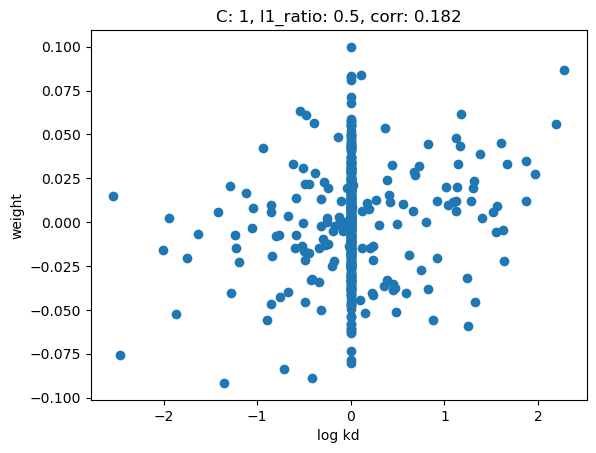

In [20]:
#plot results for C=1 and l1_ratio=0.5
model = LogisticRegression(penalty='elasticnet', solver='saga', C=1, l1_ratio=0.5)
model.fit(X_train, y_train.ravel())
weights = model.coef_[0][1:]*-1
plt.scatter(np.log(kds), weights)
plt.xlabel("log kd")
plt.ylabel("weight")
plt.title("C: 1, l1_ratio: 0.5, corr: 0.182")
plt.show()